In [ ]:

#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seep_mela_train_clean (1).csv")

In [ ]:
#encoding course column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Course_encoded'] = le.fit_transform(df['Course'])



In [ ]:
df['Course_encoded'].head()

,Course_encoded
0,4
1,4
2,4
3,4
4,4


In [ ]:
#Load our X features and y label
X = df[['Year','Sessions_Conducted','Course_encoded']].values
y = df['Participants'].values

#Split our data as training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [ ]:
print(X_train)

[[2082    1    1]
 [2081    2    4]
 [2081    1    2]
 [2082    4    1]
 [2081    4    5]
 [2082    1    2]
 [2081    2    3]
 [2082    3    5]
 [2082    4    0]
 [2081    1    0]
 [2081    2    5]
 [2082    1    1]
 [2081    4    5]
 [2081    4    2]
 [2082    2    2]
 [2081    4    2]
 [2082    2    2]
 [2081    2    2]
 [2081    4    3]
 [2081    2    4]
 [2081    1    1]
 [2081    1    0]
 [2081    4    5]
 [2081    4    2]
 [2082    1    5]
 [2082    2    3]
 [2081    1    3]
 [2082    3    4]
 [2081    2    1]
 [2081    3    2]
 [2081    2    2]
 [2081    4    2]
 [2082    1    4]
 [2082    4    5]
 [2082    2    0]
 [2082    4    0]
 [2081    4    5]
 [2082    1    0]
 [2081    2    0]
 [2082    1    3]
 [2081    2    1]
 [2081    2    4]
 [2082    3    5]
 [2082    1    2]
 [2081    4    5]
 [2082    2    3]
 [2081    2    5]
 [2081    4    0]
 [2081    2    3]
 [2082    4    3]
 [2081    3    0]
 [2081    3    1]
 [2082    1    0]
 [2081    1    3]
 [2082    3    0]
 [2081    

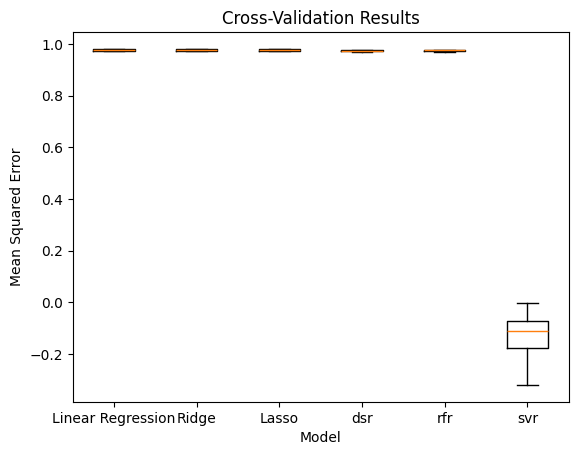

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
    "dsr": DecisionTreeRegressor(max_depth=5,min_samples_split=5),
    "rfr": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5),
    "svr": SVR()
    }

#Creating a list that will hold cross-validation scores of all models
results = []

#Creating a KFold object
#This performs training and validation for a same model for 7 times
#Every time, the validation data changes.
kf = KFold(n_splits=7, random_state=42, shuffle=True)

# Loop through the models' values
for model in models.values():

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, tick_labels=models.keys())
plt.title("Cross-Validation Results")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([120.76536651, 189.27642983, 190.15589071, 121.20509695,
       260.64627371, 331.35598923, 189.60649401, 190.59562115,
       330.47652835, 261.08600415, 191.36541577, 119.11611101,
       120.32563607, 329.15733703, 120.76536651, 332.12578385,
       189.71616027, 330.36686209, 259.43674865, 260.64627371,
       191.36541577, 329.59706747, 259.76681283, 120.87503277,
       261.96546503, 188.83669939, 191.36541577, 120.87503277,
       189.27642983, 119.55584145, 190.92568533, 260.75593997,
       190.92568533, 261.96546503, 330.91625879, 119.11611101,
       190.04622445, 190.59562115, 332.12578385, 119.4461752 ,
       120.87503277, 260.64627371, 190.92568533, 261.96546503,
       332.12578385, 260.31620953, 119.55584145, 189.71616027,
       189.71616027, 120.32563607, 119.11611101, 330.47652835,
       191.36541577, 190.04622445, 259.43674865, 190.92568533,
       261.96546503, 330.47652835, 121.20509695, 261.08600415,
       331.24632297, 190.48595489, 190.92568533, 258.99

In [ ]:


from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define a parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define a parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Define a parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Define a parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
}


# Create GridSearchCV objects for each model
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=kf, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=kf, scoring='neg_mean_squared_error')
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=kf, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=kf, scoring='neg_mean_squared_error')
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=kf, scoring='neg_mean_squared_error')


# Perform grid search for each model
print("Performing Grid Search for Decision Tree...")
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", -grid_search_dt.best_score_) # Convert back to positive MSE


print("\nPerforming Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", -grid_search_rf.best_score_)


print("\nPerforming Grid Search for Ridge...")
grid_search_ridge.fit(X_train, y_train)
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", -grid_search_ridge.best_score_)


print("\nPerforming Grid Search for Lasso...")
grid_search_lasso.fit(X_train, y_train)
print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best cross-validation score for Lasso:", -grid_search_lasso.best_score_)


print("\nPerforming Grid Search for SVR...")
grid_search_svr.fit(X_train, y_train)
print("Best parameters for SVR:", grid_search_svr.best_params_)
print("Best cross-validation score for SVR:", -grid_search_svr.best_score_)

# You can now update your models dictionary with the best estimators found by GridSearchCV
models_tuned = {
    "Linear Regression": LinearRegression(), # Linear Regression doesn't have hyperparameters to tune with this approach
    "Ridge": grid_search_ridge.best_estimator_,
    "Lasso": grid_search_lasso.best_estimator_,
    "dsr": grid_search_dt.best_estimator_,
    "rfr": grid_search_rf.best_estimator_,
    "svr": grid_search_svr.best_estimator_
}

# You can then perform cross-validation on the tuned models if desired, or use the best estimators directly
# for making predictions or evaluating on the test set.

Performing Grid Search for Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 155.62594509272762

Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest: 145.02372930632689

Performing Grid Search for Ridge...
Best parameters for Ridge: {'alpha': 0.1}
Best cross-validation score for Ridge: 137.30865851259665

Performing Grid Search for Lasso...
Best parameters for Lasso: {'alpha': 0.1}
Best cross-validation score for Lasso: 137.24896401058044

Performing Grid Search for SVR...
Best parameters for SVR: {'C': 10.0, 'epsilon': 0.5, 'kernel': 'linear'}
Best cross-validation score for SVR: 137.82083861670648
